# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Desktop/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
city_names = []
cloudiness = []
countries = []
date_list = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# # Counters
# index_counter = 1
# set_counter = 1


for i in cities:
    
    try:
        
        base_url = f"http://api.openweathermap.org/data/2.5/weather?q={i}&units=imperial&appid={weather_api_key}"
        response = requests.get(base_url).json()
        city_names.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        countries.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        
    except:
        pass

print("All finished!")

All finished!


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
from pandas import DataFrame 

cities_raw_data = {"City" : city_names,
                  "Cloudiness" : cloudiness,
                  "Countries" : countries,
                  "Date" : date_list, 
                  "Humidity" : humidity, 
                  "Latitude" : lat, 
                  "Longitude" : lng, 
                  "Max Temp" : max_temp, 
                  "Wind Speed" : wind_speed}

cities_dataframe = pd.DataFrame(cities_raw_data)
cities_dataframe.to_csv("raw_cities.csv", index=False)

In [11]:
import csv
csv_file = "raw_cities.csv"
df = pd.read_csv(csv_file)

df.head(100)

,City,Cloudiness,Countries,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Ushuaia,75,AR,1603335067,53,-54.80,-68.30,50.00,5.82
1,Bambous Virieux,40,MU,1603335067,78,-20.34,57.76,73.40,12.75
2,Rikitea,96,PF,1603335067,73,-23.12,-134.97,74.23,1.95
3,Busselton,15,AU,1603335068,57,-33.65,115.33,64.99,4.00
4,Saint-Pierre,44,RE,1603335068,64,-21.34,55.48,72.00,4.70
...,...,...,...,...,...,...,...,...,...
95,Broken Hill,60,AU,1603334883,18,-31.95,141.43,82.40,10.29
96,Manakara,13,MG,1603335089,86,-22.13,48.02,69.01,3.78
97,Ucluelet,15,CA,1603335071,84,48.93,-125.55,45.00,5.30
98,Catuday,100,PH,1603335090,83,16.29,119.81,81.99,26.66


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
high_humidity = df["Humidity"]

# Max humidity is 100
high_humidity.max()

100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

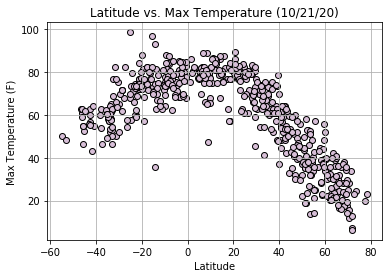

The highest temperatures recorded lie closer to 0 latitude. The temperature decreases as the latitude increases.


In [26]:
plt.scatter(df["Latitude"], df["Max Temp"], marker = "o", facecolor = "thistle", edgecolor='black')
plt.title("Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("lat_temp") 

plt.grid()
plt.show()




print("The highest temperatures recorded lie closer to 0 latitude. The temperature decreases as the latitude increases.")

## Latitude vs. Humidity Plot

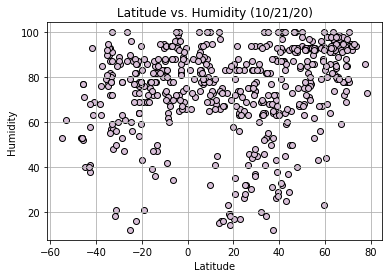

The frigid zones of Earth, also called the polar regions, have almost opposite effects. The Southern Hemisphere has a pretty even distribution of humidity across it's latitude, but decreases in humidity at -60 degrees. The Northern Hemisphere has noticably higher altitudes the higher the altitude.


In [27]:
plt.scatter(df["Latitude"], df["Humidity"], marker="o", facecolor= "thistle", edgecolor = "black")
plt.title("Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("lat_humidity") 

plt.grid()
plt.show()


print(f"The frigid zones of Earth, also called the polar regions, have almost opposite effects. The Southern Hemisphere has a pretty even distribution of humidity across it's latitude, but decreases in humidity at -60 degrees. The Northern Hemisphere has noticably higher altitudes the higher the altitude.")

## Latitude vs. Cloudiness Plot

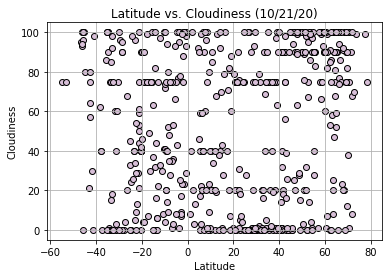

Both hemispheres seem to have similarties with cloudiness. The cloudiness drops to very low percentages as the latitude increases.


In [28]:
plt.scatter(df["Latitude"], df["Cloudiness"], marker="o", facecolor= "thistle", edgecolor = "black")

plt.title("Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig("lat_cloudiness") 

plt.grid()
plt.show()


print(f"Both hemispheres seem to have similarties with cloudiness. The cloudiness drops to very low percentages as the latitude increases.")

## Latitude vs. Wind Speed Plot

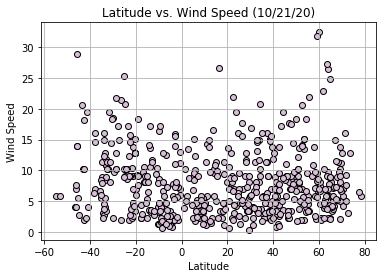

The highest wind speeds are recorded at 60 degrees in the Northern Hemisphere. The Southern Hemisphere has lower recorded wind speeds. Both hemispheres have lower wind speeds as the latitude increases.


In [29]:
plt.scatter(df["Latitude"], df["Wind Speed"], marker="o", facecolor= "thistle", edgecolor = "black")

plt.title("Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig("lat_windspeed") 

plt.grid()
plt.show()

print("The highest wind speeds are recorded at 60 degrees in the Northern Hemisphere. The Southern Hemisphere has lower recorded wind speeds. Both hemispheres have lower wind speeds as the latitude increases.")

## Linear Regression

In [18]:
northern_hemisphere = df[df["Latitude"] >= 0]
southern_hemisphere = df[df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

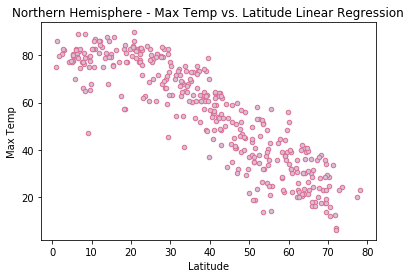

Scatter plot of the Northern Hemisphere comparing the maximum temperatues and latitude.


In [30]:
northern_hemisphere.plot(kind="scatter", x= "Latitude", y = "Max Temp", 
            title = "Northern Hemisphere - Max Temp vs. Latitude Linear Regression", color= "thistle", edgecolor= "palevioletred")

plt.savefig("north_maxtemp_lat") 

plt.show()


print('Scatter plot of the Northern Hemisphere comparing the maximum temperatues and latitude.')

There is a negative correlation between maximum temperatures and latitude in the Northern Hemisphere. As the latitude increase, the temperature decreases.
The r-squared value is: -0.8924177715115427
The equation of the regression line is: y = -0.97 x + 93.43


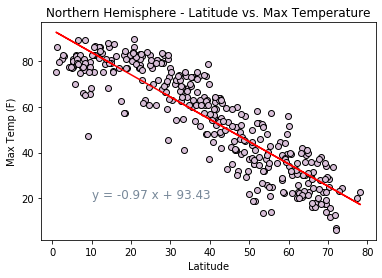

In [38]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Max Temp"]

# Defining slope and line regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

line_equation = f'y = {str(round(slope, 2))} x + {str(round(intercept, 2))}'

# Plotting scatter plot 

plt.scatter(x_values, y_values, marker="o", facecolor= "thistle", edgecolor = "black")

plt.plot(x_values, regress_values, "r-")

plt.annotate(line_equation, (10, 20), fontsize = 12, color = "lightslategrey")


plt.title("Northern Hemisphere - Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.savefig("north_linregress") 


print('There is a negative correlation between maximum temperatures and latitude in the Northern Hemisphere. As the latitude increase, the temperature decreases.')
print(f"The r-squared value is: {rvalue}")
print(f"The equation of the regression line is: {line_equation}")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The Southern Hemisphere has a negative correlation with maximum temperatures and latitude. As the latitude increases, the temperature decreases.
The r-squared value is: 0.6580551802807937
The equation of the regression line is: y = 0.54 x + 81.02


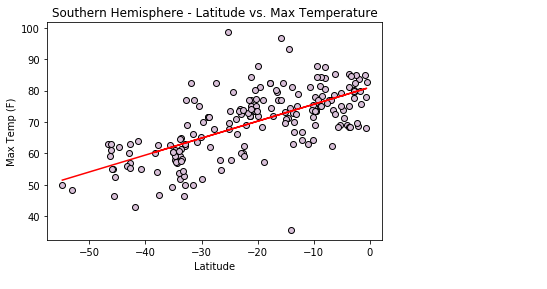

In [39]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Max Temp"]

# Defining slope and line regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

line_equation = f'y = {str(round(slope, 2))} x + {str(round(intercept, 2))}'

# Plotting scatter plot 

plt.scatter(x_values, y_values, marker="o", facecolor= "thistle", edgecolor = "black")

plt.plot(x_values, regress_values, "r-")

plt.annotate(line_equation, (10, 20), fontsize = 12, color = "black")

plt.title("Southern Hemisphere - Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.savefig("south_maxtemp_lat")

print('The Southern Hemisphere has a negative correlation with maximum temperatures and latitude. As the latitude increases, the temperature decreases.')

print(f"The r-squared value is: {rvalue}")
print(f"The equation of the regression line is: {line_equation}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

There is a somewhat positive correlation of humidity across all latitudes in the Northern Hemisphere.
The r-squared value is: 0.287490228748
The equation of the regression line is: y = 0.31 x + 63.15


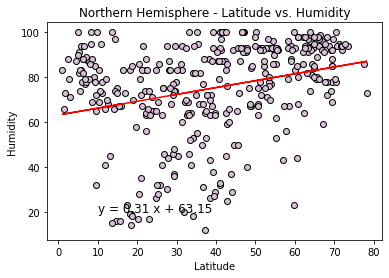

In [56]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Humidity"]

# Defining slope and line regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

line_equation = f'y = {str(round(slope, 2))} x + {str(round(intercept, 2))}'

# Plotting scatter plot 

plt.scatter(x_values, y_values, marker="o", facecolor= "thistle", edgecolor = "black")

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_equation, (10, 20), fontsize = 12, color = "black")

plt.title("Northern Hemisphere - Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("north_humidity_linregress") 

print('There is a somewhat positive correlation of humidity across all latitudes in the Northern Hemisphere.')

print(f"The r-squared value is: {rvalue}")
print(f"The equation of the regression line is: {line_equation}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Compared to the Northern Hemisphere, the Southern Hemisphere seems to have an even smaller positive correlation for humidity and latitude.
The r-squared value is: 0.286313724703079
The equation of the regression line is: y = 0.38 x + 81.42


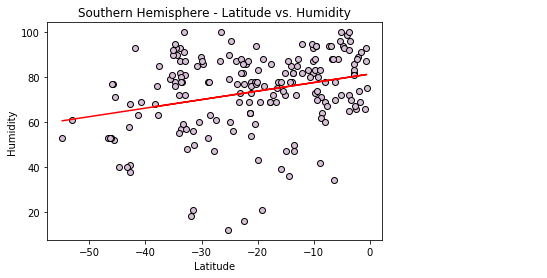

In [45]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Humidity"]

# Defining slope and line regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

line_equation = f'y = {str(round(slope, 2))} x + {str(round(intercept, 2))}'

# Plotting scatter plot 

plt.scatter(x_values, y_values, marker="o", facecolor= "thistle", edgecolor = "black")

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_equation, (10, 20), fontsize = 12, color = "lightslategrey")

plt.title("Southern Hemisphere - Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("south_humidity_linregress")

print('Compared to the Northern Hemisphere, the Southern Hemisphere seems to have an even smaller positive correlation for humidity and latitude.')

print(f"The r-squared value is: {rvalue}")
print(f"The equation of the regression line is: {line_equation}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

There is a positive correlation in the Northern Hemisphere between latitude and cloudiness. As latitude increases, so does cloudiness.
The r-squared value is: 0.3096455274365463
The equation of the regression line is: y = 0.62 x + 26.48


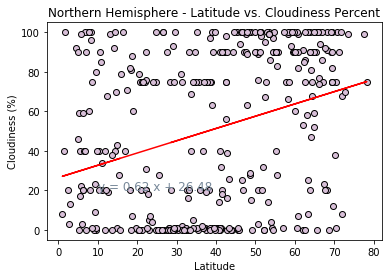

In [51]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Cloudiness"]

# Defining slope and line regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

line_equation = f'y = {str(round(slope, 2))} x + {str(round(intercept, 2))}'

# Plotting scatter plot 

plt.scatter(x_values, y_values, marker="o", facecolor= "thistle", edgecolor = "black")

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_equation, (10, 20), fontsize = 12, color = "lightslategrey")

plt.title("Northern Hemisphere - Latitude vs. Cloudiness Percent")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("north_clouds_linregress") 

print(f'There is a positive correlation in the Northern Hemisphere between latitude and cloudiness. As latitude increases, so does cloudiness.')

print(f"The r-squared value is: {rvalue}")
print(f"The equation of the regression line is: {line_equation}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The Southern Hemispheres correlation between latitude and cloudiness is somewhat positive.
The r-squared value is: 0.286313724703079
The equation of the regression line is: y = 0.38 x + 81.42


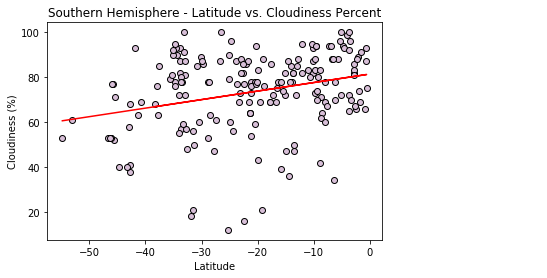

In [55]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Humidity"]

# Defining slope and line regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

line_equation = f'y = {str(round(slope, 2))} x + {str(round(intercept, 2))}'

# Plotting scatter plot 

plt.scatter(x_values, y_values, marker="o", facecolor= "thistle", edgecolor = "black")

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_equation, (10, 20), fontsize = 12, color = "lightslategrey")

plt.title("Southern Hemisphere - Latitude vs. Cloudiness Percent")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("south_clouds_linregress") 

print('The Southern Hemispheres correlation between latitude and cloudiness is somewhat positive.')


print(f"The r-squared value is: {rvalue}")
print(f"The equation of the regression line is: {line_equation}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The Northern Hemisphere almost has no correlation between wind speeds and latitude, but is somewhat positive.
The r-squared value is: 0.1131395970852426
The equation of the regression line is: y = 0.03 x + 6.47


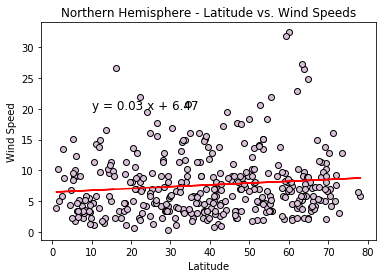

In [57]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Wind Speed"]

# Defining slope and line regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

line_equation = f'y = {str(round(slope, 2))} x + {str(round(intercept, 2))}'

# Plotting scatter plot 

plt.scatter(x_values, y_values, marker="o", facecolor= "thistle", edgecolor = "black")

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_equation, (10, 20), fontsize = 12, color = "black")

plt.title("Northern Hemisphere - Latitude vs. Wind Speeds")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig("north_windspeeds_linregress") 

print('The Northern Hemisphere almost has no correlation between wind speeds and latitude, but is somewhat positive.')

print(f"The r-squared value is: {rvalue}")
print(f"The equation of the regression line is: {line_equation}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The Southern Hemisphere has a positive correlation between wind speeds and latitude. As latitude increases, the wind speeds increase in small amounts.
The r-squared value is: -0.266260489936914
The equation of the regression line is: y = -0.11 x + 6.03


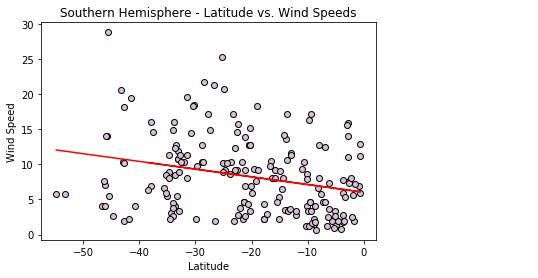

In [59]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Wind Speed"]

# Defining slope and line regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

line_equation = f'y = {str(round(slope, 2))} x + {str(round(intercept, 2))}'

# Plotting scatter plot 

plt.scatter(x_values, y_values, marker="o", facecolor= "thistle", edgecolor = "black")

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_equation, (10, 20), fontsize = 12, color = "lightslategrey")

plt.title("Southern Hemisphere - Latitude vs. Wind Speeds")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig("south_windspeed_linregress") 

print('The Southern Hemisphere has a positive correlation between wind speeds and latitude. As latitude increases, the wind speeds increase in small amounts.')


print(f"The r-squared value is: {rvalue}")
print(f"The equation of the regression line is: {line_equation}")